# Paired bar chart showing the meat consumption per capita (top 10 countries) in 2022 and 2023

## Get the data

Load the data into a [Pandas](https://pandas.pydata.org/) dataframe.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_ornaments.titles import set_title_and_subtitle

df = pd.read_csv('https://raw.githubusercontent.com/bianconif/graphic_communication_notebooks/refs/heads/master/data/top-10-meat-consumption-countries-2023.csv',comment='#')
print(df.head())

         Country  Value  Year
0      Argentina   34.4  2023
1      Argentina   34.0  2022
2  United States   24.7  2023
3  United States   25.4  2022
4      Australia   23.7  2023


Select the 10 countries with the highest per capita annual meat consumption in 2023 (top-10).

In [53]:
years = (2022,2023)
df_top_10 = df[df['Year'] == years[1]].sort_values(by='Value', ascending=False)
top_10_countries = df_top_10[0:10]['Country']
print(top_10_countries)

0         Argentina
2     United States
4         Australia
6            Israel
8        Kazakhstan
10           Brazil
12           Canada
14            Chile
16      Switzerland
18         Paraguay
Name: Country, dtype: object


Filter the data by the top-10 countries.

In [54]:
df = df[df['Country'].isin(top_10_countries)]
print(df.head())

         Country  Value  Year
0      Argentina   34.4  2023
1      Argentina   34.0  2022
2  United States   24.7  2023
3  United States   25.4  2022
4      Australia   23.7  2023


## Create the bar chart

Define a colour palette for the bars based on [Matplotlib named colours](https://matplotlib.org/stable/gallery/color/named_colors.html). Note the we assign the `tab:orange` and `tab:blue` colours from the Tableau Palette respectively to years 2022 and 2023. Also set the bars' border width and colour.

In [55]:
palette = {years[0]:'tab:orange', years[1]:'tab:blue'}
border_props = {'edgecolor':'black', 'linewidth':0.5}

Create an empty figure (`fig`) with one sub-plot (`ax`) using [Matplotlib's object oriented interface](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html) [1]. Then use the subplot as the canvas where to generate the bar chart using Seaborns's [`seaborn.barplot`]https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) method. Finally we rotate the x-axis tick labels vertically to avoid them from overlapping. 

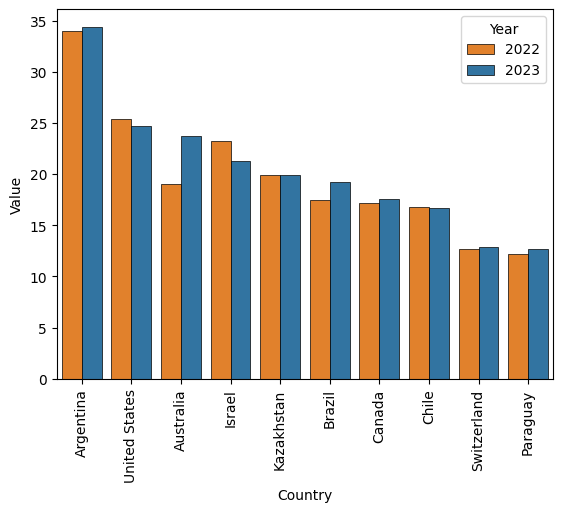

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1)
g = sns.barplot(data=df, x='Country', y='Value', hue='Year', palette=palette, ax=ax, **border_props)
ax.tick_params('x', rotation=90)

## Get rid of the spines

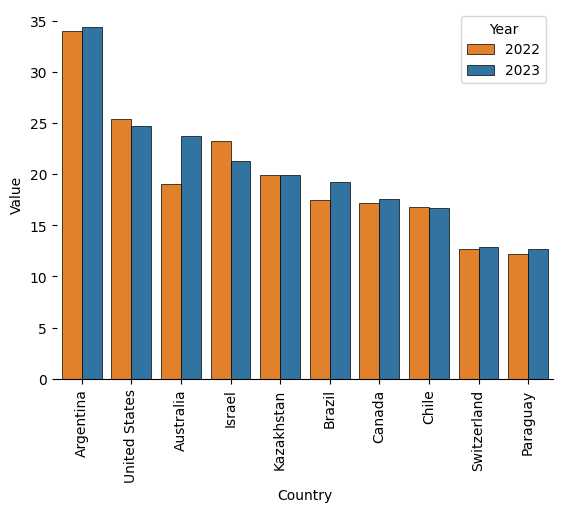

In [57]:
ax.spines[['top', 'right', 'left']].set_visible(False)
display(fig)

## Show the values at the top of each bar

Use [`matplotlib.axes.Axes.bar_label`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html) to display the values at the top of each bar. The `padding` parameter defines the space between the values and the bars.

In [58]:
ax.bar_label(container=bars, padding=3)
display(fig)

NameError: name 'bars' is not defined

## Add title and subtitle

Add a title and subtitle to the chart with [`mpl_ornaments.set_title_and_subtitle`](https://bianconif.github.io/mpl_ornaments/reference/).

In [ ]:
title = f'Meat consumption\u2014top 10 countries ({year})'
subtitle = f'Beef and veal, in Kg per capita/year. Source: OECD'
set_title_and_subtitle(fig=fig, title=title, subtitle=subtitle, alignment='left', h_offset=60)
display(fig)

## References

[1] Bianconi F. [Data and process visualisation for graphic communication: A hands-on approach with Python](https://link.springer.com/book/10.1007/978-3-031-57051-3). Cham: Springer, 2024.

## Licence

Copyright © 2025 [Francesco Bianconi](https://www.bianconif.net/Home.html). All rights reserved.